In [1]:
import pandas as pd

# 1. Read csv file

In [2]:
products = pd.read_csv("amazon_baby.csv")
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


# 2. Cound the number of each product

- Count the number of each product in the table by `groupby()` and `size()`
- Sort the number of each product by descending order

In [3]:
products.groupby(['name']).size().reset_index(name='counts').sort_values('counts', ascending=False)

,name,counts
30992,Vulli Sophie the Giraffe Teether,785
26127,"Simple Wishes Hands-Free Breastpump Bra, Pink,...",562
14331,Infant Optics DXR-5 2.4 GHz Digital Video Baby...,561
2291,Baby Einstein Take Along Tunes,547
7159,"Cloud b Twilight Constellation Night Light, Tu...",520
...,...,...
21504,Nuby BPA FREE No-Spill Insulated Cool Sipper C...,1
5588,Bummis Fitted Bamboozle (Bamboo) Diaper - Size...,1
5586,Bummis Fabulous Wet Bags - Small - Blue,1
21507,"Nuby Baby Care Nail Clippers, Colors may vary",1


# 3. Rating histogram of certain product 

Here, we are looking at 'Vulli Sophie the Giraffe Teether', 'giraffe' for short.

In [4]:
import matplotlib as plt
import seaborn as sns 

<AxesSubplot:xlabel='rating', ylabel='count'>

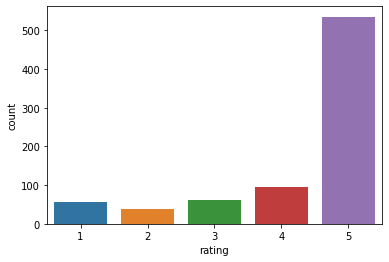

In [5]:
giraffe_reviews = products[products['name']=='Vulli Sophie the Giraffe Teether']

sns.countplot(x = 'rating', data = giraffe_reviews)



# 4. Build a sentiment classifier
## 4.1 Define what is positive and negative sentiment

<AxesSubplot:xlabel='rating', ylabel='count'>

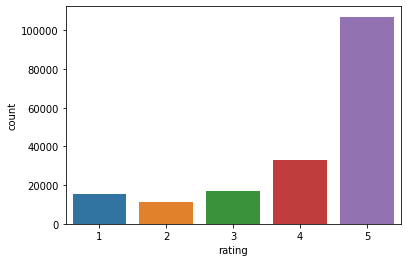

In [6]:
sns.countplot(x = 'rating', data = products)

In [7]:
# ignore all 3*  reviews
products = products[products['rating']!= 3]

#positive sentiment = 4-star or 5-star reviews
products['sentiment'] = (products['rating'] >= 4)*1

products.head(5)

,name,review,rating,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,1


<AxesSubplot:xlabel='sentiment', ylabel='count'>

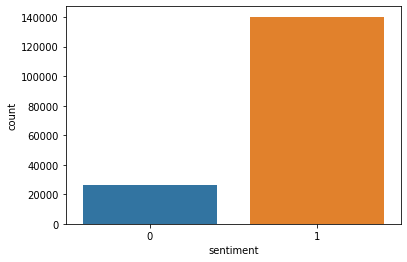

In [8]:
sns.countplot(x = 'sentiment', data = products)

# 5. Build word count vectors

In [9]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

## 5.1 Build word count dict for one row

In [10]:
text = ['great','awesome', 'great','no']

dict = {}
for word in text:
    if word in selected_words:
        if word in dict.keys():
            dict[word] += 1
        else:
            dict[word] = 1
print(dict)

{'great': 2, 'awesome': 1}


## 5.2 Convert a sentence into word list

In [11]:
def textToList(text):
    for ch in ['\\','`','*','_','{','}','[',']','(',')','>','#','+','-','.','!','$','\'']:
        text = text.replace(ch," ")
    return text.split()

## 5.3 Build a function that can be used for each row

In [12]:
def wordCount(text):
    # convert input into string type
    text = str(text).lower()
    # replace symbols with space
    for ch in ['...',';',':','!','?','-','.',',' ,'`','*','_','{','}','[',']','(',')','>','#','+','-','.','!','$','\'']:
        text = text.replace(ch," ")
    # split review text into a list of words
    li = text.split()
    
    # create an empty dict to store words and counts
    words_count = {}
    
    # go through each word in the list
    for word in li:
        if word in selected_words:
            if word in words_count.keys():
                words_count[word] += 1
            else:
                words_count[word] = 1
    return words_count

In [13]:
# test above function
text = 'I am really Great ! and love, great, terrible! that is awful.'
wordCount(text)

{'great': 2, 'love': 1, 'terrible': 1, 'awful': 1}

In [14]:
products['selected_word_count'] = products['review'].apply(wordCount)
products

,name,review,rating,sentiment,selected_word_count
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,1,{'love': 1}
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,1,{}
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,1,{'love': 2}
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,{'great': 1}
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,1,{'great': 1}
...,...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5,1,{'great': 2}
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5,1,{'great': 1}
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5,1,{'great': 2}
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5,1,{}


## 5.4 Count the popularity of the selected words in the whole dataset

### Starting build a function from the simplest case

In [18]:
from collections import Counter
from functools import reduce

def sum_dict(d1, d2):
    return Counter(d1) + Counter(d2)


In [19]:
d1 = {"k1": 1, "k2": 2}
d2 = {"k1": 4, "k3": 3}

sum_dict(d1, d2)

Counter({'k1': 5, 'k2': 2, 'k3': 3})

In [21]:
l1 = [d1, d2]
reduce(lambda x, y: sum_dict(x, y), l1)

Counter({'k1': 5, 'k2': 2, 'k3': 3})

### Count the popularity of the word

In [22]:
reduce(lambda x, y: sum_dict(x, y), products['selected_word_count'])

Counter({'love': 41928,
         'great': 55753,
         'fantastic': 1662,
         'amazing': 2627,
         'awesome': 3885,
         'terrible': 1142,
         'bad': 4156,
         'wow': 397,
         'hate': 1099,
         'awful': 686,
         'horrible': 1108})

# 6. Train our sentiment classifier

In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(products, test_size=0.2, random_state=42, shuffle=False)


In [25]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(train_set[['rating']], train_set['sentiment'])


LogisticRegression()

In [36]:
products['pred_sentiment'] = log_model.predict_proba(test_set)

/Users/jingai/workspace/ML-washington/venv_x86/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[5 4 5 ... 5 5 5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

selected_word_model = log_model.fit(train_set['selected_word_count'], train_set['sentiment'])



In [ ]:
selected_word_model = 